In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [36]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#色彩空間轉換

## 1-1. cluster with only RGB values

In [42]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [ ]:
h, w, c = img.shape
#print(img.shape)#1024*1024 pixel值3有rgb 彩色
Z=img.reshape((-1,3))
Ka=[2,4]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center=km_clust(Z,K)
    #print(label,center)
    #Now convert back into unit8,and make original image
    center=np.uint8(center[:,:3])
    res=center[label.flatten()]#原本影像的大小(二維)
    res=res.reshape(img.shape)

    #plt.figure(figsize=(16,12))
    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)

## 1-2. cluster with RGB values and the location

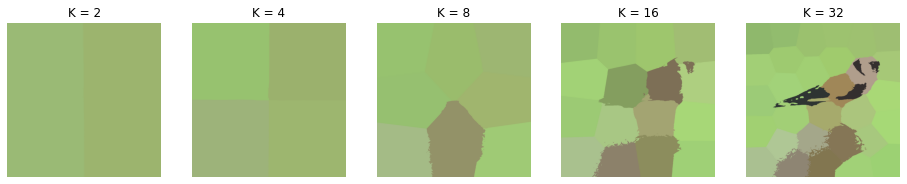

In [39]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):        #h means row
    for w in range(len(img[h])): #w means column(img[h]:縣在市位於h row，h row的長度即為column數)
        Z[h][w] = np.append(img[h][w], [[h], [w]])#img[h][w]:rgb的值
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
#第一種依色彩區分 第二種依位置區分(鄰近區域有相同色塊)
![](images/7.4_result.PNG)

In [40]:
h,w,c=img.shape
print(img.shape)
#由於pixel值沒有正規化，因此針對照片大小1024縮放成語pixel值一樣(256)

(1024, 1024, 3)


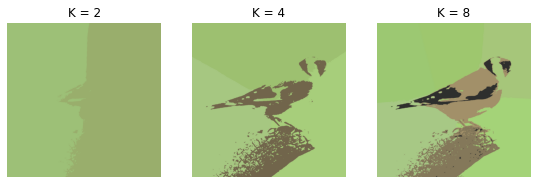

In [41]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):        #h means row
    for w in range(len(img[h])): #w means column(img[h]:縣在市位於h row，h row的長度即為column數)
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])#h,w座標要跟pixel值一樣，因此1024/4=256
Z = Z.reshape(-1, 5)

Ks = [2,4,8] #Ks=[2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [ ]:
#從以上結果觀察到，既可以抓出正確顏色，又可以抓出正確位置
#將影像存成一筆筆data，rgb為其特徵點。若要進行訊號 文字處理，可以將錢處理完的結果，存成excel表格，或是像上面把數位影像的pixel值存成特徵一樣。
#(想辦法讓影像變成量化的資料的概念)